# Task 6: 

### Decision Tree Classifier of Iris Datasets.

#### Done by: Poulami Bakshi 
##### (Using PyCaret(Multiclass Classification).)

## The Sparks Foundation 

### Data Science and Business Analytics Intern

In [2]:
from google.colab import files 
  
  
uploaded = files.upload()

Saving Iris (1).csv to Iris (1).csv


In [3]:
#PyCaret is an open-source, low-code machine learning library in Python that automates machine learning workflows. 
#It is an end-to-end machine learning and model management tool that speeds up the experiment cycle exponentially and makes you more productive.
!pip install pycaret

     |████████████████████████████████| 266kB 5.6MB/s 
     |████████████████████████████████| 61kB 5.1MB/s 
     |████████████████████████████████| 215kB 7.9MB/s 
     |████████████████████████████████| 6.8MB 8.6MB/s 
     |████████████████████████████████| 276kB 46.0MB/s 
     |████████████████████████████████| 81kB 7.2MB/s 
     |████████████████████████████████| 2.0MB 36.8MB/s 
     |████████████████████████████████| 1.7MB 22.1MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 102kB 9.3MB/s 
     |████████████████████████████████| 245kB 36.4MB/s 
     |████████████████████████████████| 14.2MB 302kB/s 
     |████████████████████████████████| 1.2MB 36.4MB/s 
     |████████████████████████████████| 81kB 6.3MB/s 
     |████████████████████████████████| 1.1MB 33.3MB/s 
     |████████████████████████████████| 3.2MB 32.1MB/s 
 

In [4]:
#for running PyCaret in google colab.
from pycaret.utils import enable_colab
enable_colab( )

Colab mode enabled.


In [5]:
#[#from pycaret.datasets import get_data]
import pandas as pd 
import io 
  #reading the data 
df = pd.read_csv(io.BytesIO(uploaded['Iris (1).csv'])) 
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
#number of records and features
df.shape

(150, 6)

In [7]:
df1=df.sample(frac=0.90, random_state=125)
df_unseen=df.drop(df1.index) #from the whole dataset keeping few records seperately while the time of experimenting.
df1.reset_index(inplace=True, drop=True)
df_unseen.reset_index(inplace=True, drop=True)

In [8]:
#135 records for the experiment 
#and 15 records will act as a new data for predicting.
df1.shape, df_unseen.shape

((135, 6), (15, 6))

In [9]:
from pycaret.classification import *

In [10]:
#The setup() initializes the environment in pycaret and creates the transformation pipeline to prepare the data for modeling and deployment.
# It takes two mandatory parameters: a pandas dataframe and the name of the target column. 
#All other parameters are optional and are used to customize the pre-processing pipeline 
exp_clf101=setup(data=df1, target='Species', session_id=123)

,Description,Value
0,session_id,123
1,Target,Species
2,Target Type,Multiclass
3,Label Encoded,"Iris-setosa: 0, Iris-versicolor: 1, Iris-virgi..."
4,Original Data,"(135, 6)"
5,Missing Values,False
6,Numeric Features,5
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [11]:
#Comparing all models to evaluate performance is the recommended starting point for modeling once the setup is completed.
# This function trains all models in the model library and scores them using stratified cross validation for metric evaluation.
best=compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,1.0000,1.0,1.0000,1.0000,1.0000,1.0000,1.0000,0.457
knn,K Neighbors Classifier,1.0000,1.0,1.0000,1.0000,1.0000,1.0000,1.0000,0.121
dt,Decision Tree Classifier,1.0000,1.0,1.0000,1.0000,1.0000,1.0000,1.0000,0.020
rf,Random Forest Classifier,1.0000,1.0,1.0000,1.0000,1.0000,1.0000,1.0000,0.472
qda,Quadratic Discriminant Analysis,1.0000,1.0,1.0000,1.0000,1.0000,1.0000,1.0000,0.022
ada,Ada Boost Classifier,1.0000,1.0,1.0000,1.0000,1.0000,1.0000,1.0000,0.107
gbc,Gradient Boosting Classifier,1.0000,1.0,1.0000,1.0000,1.0000,1.0000,1.0000,0.196
lda,Linear Discriminant Analysis,1.0000,1.0,1.0000,1.0000,1.0000,1.0000,1.0000,0.021
lightgbm,Light Gradient Boosting Machine,1.0000,1.0,1.0000,1.0000,1.0000,1.0000,1.0000,0.092
nb,Naive Bayes,0.9889,1.0,0.9889,0.9917,0.9886,0.9833,0.9849,0.021


In [12]:
#create_model is the most granular function in PyCaret and is often the foundation behind most of the PyCaret functionalities. 
#As the name suggests this function trains and evaluates a model using cross validation that can be set with fold parameter.
dt=create_model('dt') #Decision Tree Classifier

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0
5,1.0,1.0,1.0,1.0,1.0,1.0,1.0
6,1.0,1.0,1.0,1.0,1.0,1.0,1.0
7,1.0,1.0,1.0,1.0,1.0,1.0,1.0
8,1.0,1.0,1.0,1.0,1.0,1.0,1.0
9,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [13]:
print(dt)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')


In [14]:
#When a model is created using the create_model() function it uses the default hyperparameters to train the model.
# In order to tune hyperparameters, the tune_model() function is used.
tune_dt=tune_model(dt)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0
5,1.0,1.0,1.0,1.0,1.0,1.0,1.0
6,1.0,1.0,1.0,1.0,1.0,1.0,1.0
7,1.0,1.0,1.0,1.0,1.0,1.0,1.0
8,1.0,1.0,1.0,1.0,1.0,1.0,1.0
9,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [15]:
print(tune_dt)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features='log2', max_leaf_nodes=None,
                       min_impurity_decrease=0.0002, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')


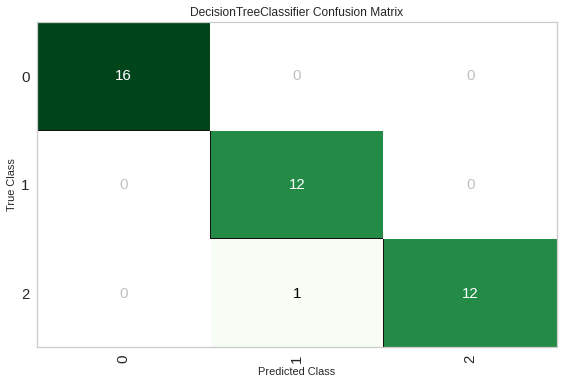

In [17]:
plot_model(tune_dt, plot='confusion_matrix') #plotting the confusion matrix.

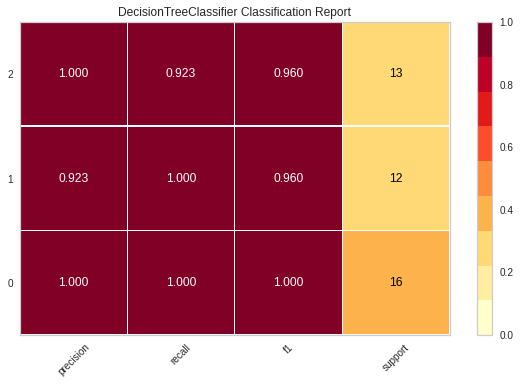

In [18]:
plot_model(tune_dt, plot='class_report') #plotting the classification report.

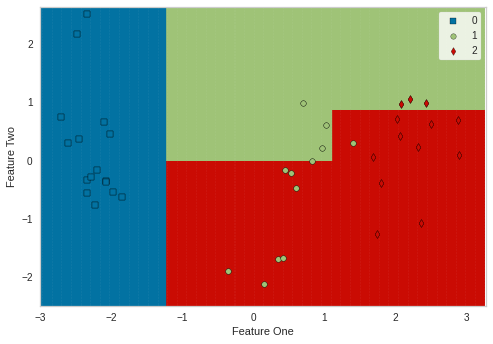

In [19]:
plot_model(tune_dt, plot='boundary') #Decision boundary plot

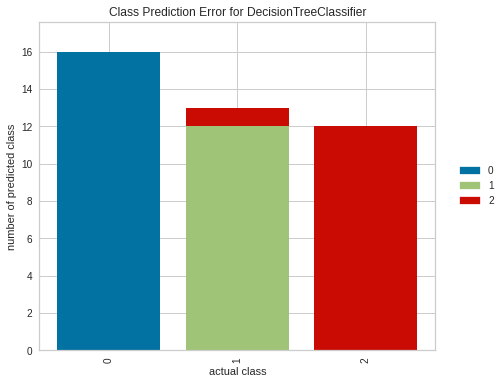

In [20]:
plot_model(tune_dt, plot='error') #Prediction error plot

In [16]:
evaluate_model(tune_dt)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [22]:
predict_model(tune_dt); 

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Decision Tree Classifier,0.9756,0.9828,0.9744,0.9775,0.9756,0.9632,0.964


In [23]:
final_dt=finalize_model(tune_dt)

In [24]:
print(final_dt)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features='log2', max_leaf_nodes=None,
                       min_impurity_decrease=0.0002, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')


In [25]:
#The predict_model() function is also used to predict on the unseen dataset.
#The Label and Score columns are added onto the data_unseen set. Label is the prediction and score is the probability of the prediction. 
unseen_predicted=predict_model(final_dt, data=df_unseen)
unseen_predicted.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Label,Score
0,1,5.1,3.5,1.4,0.2,Iris-setosa,Iris-setosa,1.0
1,38,4.9,3.1,1.5,0.1,Iris-setosa,Iris-setosa,1.0
2,44,5.0,3.5,1.6,0.6,Iris-setosa,Iris-setosa,1.0
3,51,7.0,3.2,4.7,1.4,Iris-versicolor,Iris-versicolor,1.0
4,60,5.2,2.7,3.9,1.4,Iris-versicolor,Iris-versicolor,1.0


In [42]:
save_model(final_dt,'Final DT Model 09-april-21') #Saving the model.

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='Species',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_stra...
                 ('dfs', 'passthrough'), ('pca', 'passthrough'),
                 ['trained_model',
                  DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                         criterion='entropy', max_depth=4,
                        

In [43]:
#Loading the saved model:

saved_final_DT=load_model('Final DT Model 09-april-21')

Transformation Pipeline and Model Successfully Loaded


In [44]:
#Once the model is loaded in the environment, you can simply use it to predict on any new data using the same predict_model() function.
new_prediction=predict_model(saved_final_DT, data=df_unseen)

In [45]:
new_prediction
#Notice that the results of unseen_predictions and new_prediction are identical.

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,Label,Score
0,5.1,3.5,1.4,0.2,setosa,setosa,1.000
1,4.9,3.6,1.4,0.1,setosa,setosa,1.000
2,5.0,3.5,1.6,0.6,setosa,setosa,1.000
3,7.0,3.2,4.7,1.4,versicolor,versicolor,1.000
4,5.2,2.7,3.9,1.4,versicolor,versicolor,1.000
5,5.6,2.9,3.6,1.3,versicolor,versicolor,1.000
6,5.6,3.0,4.5,1.5,versicolor,versicolor,0.875
7,5.8,2.7,4.1,1.0,versicolor,versicolor,1.000
8,6.7,3.1,4.7,1.5,versicolor,versicolor,1.000
9,6.3,2.3,4.4,1.3,versicolor,versicolor,1.000
